In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *

In [69]:

# df = pd.read_csv('../(Data) Last Year/training/prices_round_1_day_0.csv', delimiter=';')
df = pd.read_csv('verify2.csv', delimiter=';')
df.fillna(0, inplace=True)

In [ ]:
df

In [ ]:
df.columns.to_list()

In [ ]:
sns.scatterplot(data=df, x='timestamp', y='profit_and_loss', hue='product', s = 1)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')


Text(0, 0.5, 'Mid Price')

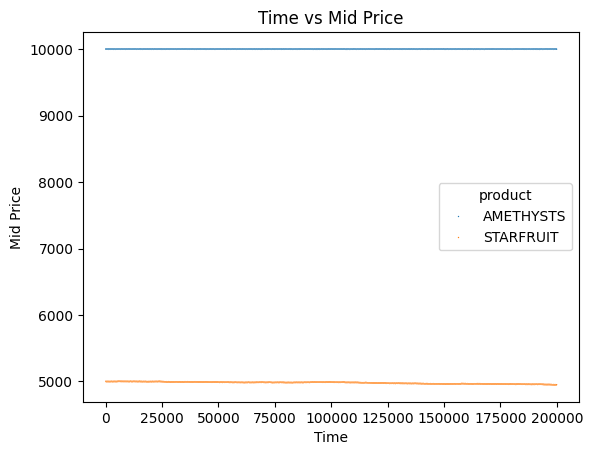

In [73]:
sns.scatterplot(data=df, x='timestamp', y='mid_price', hue='product', s = 1)
plt.title('Time vs Mid Price')
plt.xlabel('Time')
plt.ylabel('Mid Price')

Text(0, 0.5, 'Mid Price')

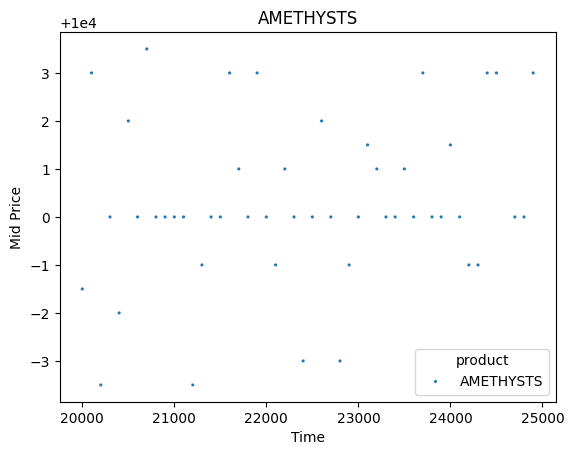

In [126]:
sns.scatterplot(data=df[df['product'] == 'AMETHYSTS'].iloc[200:250], x='timestamp', y='mid_price', hue='product', s = 6)
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

[4999.09219592 4999.09219592 4999.09219592 4999.09219592 4999.09219592
 4999.09219592 4999.09219592 4999.09219592 4999.09219592 4999.09219592
 4999.09219592 4999.09219592 4999.09219592 4999.09219592 4999.09219592]
[4999.08613531 4999.08613531 4999.08613531 4999.08613531 4999.08613531
 4999.08613531 4999.08613531 4999.08613531 4999.08613531 4999.08613531
 4999.08613531 4999.08613531 4999.08613531 4999.08613531 4999.08613531]
[4999.02161918 4999.02161918 4999.02161918 4999.02161918 4999.02161918
 4999.02161918 4999.02161918 4999.02161918 4999.02161918 4999.02161918
 4999.02161918 4999.02161918 4999.02161918 4999.02161918 4999.02161918]
[4999.02464948 4999.02464948 4999.02464948 4999.02464948 4999.02464948
 4999.02464948 4999.02464948 4999.02464948 4999.02464948 4999.02464948
 4999.02464948 4999.02464948 4999.02464948 4999.02464948 4999.02464948]
[4999.03198474 4999.03198474 4999.03198474 4999.03198474 4999.03198474
 4999.03198474 4999.03198474 4999.03198474 4999.03198474 4999.03198474
 4

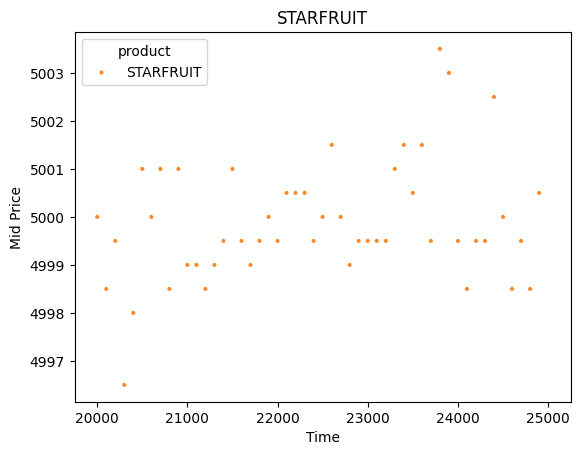

In [130]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[200:250], x='timestamp', y='mid_price', hue='product', s = 10, palette=['#fa8825'])
for i in range(200, 250, 1):
    x_new = []
    minus = -1400
    for _ in range(15):
        x_new.append(time[i] + minus)
    # x_1 = time[i]-100
    # x_2 = time[i]-200
    # x_3 = time[i]-300
    # x_new = [x_3, x_2, x_1, time[i]]
    c, m = lin_reg(np.array(x_new), np.array(gradient_lst[i]))
    y = m * np.array(x_new) + c
    print(y)
    plt.plot(x_new, y)
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.show()


In [92]:
gradient_lst[0]

[5000.458333333333, 4999.380952380952, 4999.5, 4998.5]

In [70]:
def find_average(row):
    return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
 row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                  row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])


df['avg_price'] = df.apply(find_average, axis=1)

In [71]:
def lin_reg(x, y):
        # number of observations/points
        n = np.size(x)
        
        # mean of x and y vector
        m_x = np.mean(x)
        m_y = np.mean(y)
        
        # calculating cross-deviation and deviation about x
        SS_xy = np.sum(y*x) - n*m_y*m_x
        SS_xx = np.sum(x*x) - n*m_x*m_x
        
        # calculating regression coefficients
        b_1 = SS_xy / SS_xx
        b_0 = m_y - b_1*m_x
        
        return (float(b_0), float(b_1))

In [123]:
def check_validity():
    df_star = df[df["product"] == "STARFRUIT"]
    success = 0
    lst = np.array([])
    x = np.array([i for i in range(15)])
    time = []
    gradient_lst = []
    for index, row in df_star.iterrows():
        if index == 3999:
            break
        curr_avg = row["avg_price"]
        curr_mid = row["mid_price"]
        next_mid = df.iloc[index+1]["mid_price"]

        if len(lst) < 15:
            lst = np.append(lst, curr_avg)
            continue
        else:
            lst = lst[1:]
            lst = np.append(lst, curr_avg)
        
        c, gradient = lin_reg(x, lst)
        time.append(row["timestamp"])
        gradient_lst.append(lst.tolist())
        # df["lin_reg_avg_price"] = df
        # print(c, gradient)
        # predicting a down trend
        # if curr_avg - curr_mid < 0:
        if gradient < 0:
            if next_mid < curr_mid:
                success += 1
        
        # if curr_avg - curr_mid > 0:
        if gradient > 0:
            if next_mid > curr_mid:
                success += 1

    return time, gradient_lst

time, gradient_lst = check_validity()

In [ ]:
879/2000

In [ ]:
print(sum([df.loc[3995, 'bid_volume_1'], df.loc[3995, 'bid_volume_2'], df.loc[3995, 'bid_volume_3'], df.loc[3995, 'ask_volume_1'], df.loc[3995, 'ask_volume_2'], df.loc[3995, 'ask_volume_3']]))

In [ ]:
df[df['product'] == 'STARFRUIT'].to_csv('starfruit_my_trades.csv', index = False)

In [ ]:
df.replace(0, np.nan, inplace=True)

In [ ]:
lowest_ask = df[["ask_price_1", "ask_price_2", "ask_price_3"]].min(axis=1)

highest_bid = df[["bid_price_1", "bid_price_2", "bid_price_3"]].min(axis=1)

spread = lowest_ask - highest_bid

df['spread'] = spread

In [ ]:
sns.scatterplot(data=df, x='timestamp', y='spread', hue='product', s = 2)
plt.title('Spread')
plt.xlabel('Time')
plt.ylabel('Price')

## Finding EMA

In [ ]:


def calculate_ema(col_name: str, time = 3):
    for product in df['product'].unique():
        df[col_name + f"_{product}"] = df[df['product'] == str(product)]['mid_price'].ewm(span = time, adjust = False).mean()
    # return df[df['product'] == product]


In [ ]:
# df_star = calculate_ema(product= "STARFRUIT", col_name="ema3")
calculate_ema(col_name="ema3", time=3)
calculate_ema(col_name="ema7", time=7)
calculate_ema(col_name="ema20", time=20)
calculate_ema(col_name="ema100", time=100)

In [ ]:
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema3_AMETHYSTS', label='ema3')
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema100_AMETHYSTS', label='ema100')
sns.scatterplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 2, palette=['#000000'])
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

In [ ]:
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema20_STARFRUIT', label='ema20', linewidth=1)
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema100_STARFRUIT', label='ema100', linewidth=1)
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 1, palette=['#000000'])
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

In [ ]:
trade_df = convert_to_pandas("scripts/testMM.log")

In [ ]:
trade_df["timestamp"] = trade_df["timestamp"] / 100
trade_df.set_index('timestamp', inplace=True)

In [ ]:

sns.barplot(data=trade_df[trade_df['product'] == 'STARFRUIT'].loc[1300: 1380], x='timestamp', y='position', label = "position")
ax2 = plt.twinx()
# sns.barplot(data=trade_df[trade_df['product'] == 'AMETHYSTS'].iloc[100:], x='timestamp', y='price', color="r", ax=ax2, label = "price")

plt.legend(loc='upper left')

In [ ]:
len(trade_df) # the amount of trades that have gone thru

In [ ]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[1330: 1350], x='timestamp', y='profit_and_loss', hue='product', s = 5)

In [ ]:
df[df['product'] == 'STARFRUIT']["mid_price"].iloc[1337]

In [ ]:
trade_df[df['product'] == 'STARFRUIT']["price"].loc[1330 : 1400]

In [ ]:

sns.barplot(data=trade_df[trade_df['product'] == 'AMETHYSTS'].loc[830: 1050], x='timestamp', y='position', label = "position")
ax2 = plt.twinx()
# sns.barplot(data=trade_df[trade_df['product'] == 'AMETHYSTS'].iloc[100:], x='timestamp', y='price', color="r", ax=ax2, label = "price")

plt.legend(loc='upper left')

In [ ]:
sns.scatterplot(data=df[df['product'] == 'A'].iloc[750: 850], x='timestamp', y='profit_and_loss', hue='product', s = 5)